In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown as md

### With 100 points, three cases:

1. Ideal
2. Gaussian noise
3. Uniform noise

we have created a dataset with 100 points. The relation we want to investigate is

$$
2.5382 cos(x)+x^2-0.5
$$

In [2]:
import numpy as np

X = 5 * np.random.randn(100,1)
a = 2 #weight for noise
y = 2.5382 * np.cos(X) + X ** 2 - 0.5 
n = y + a*np.random.randn(100,1)
u = y + a*np.random.rand(100,1)

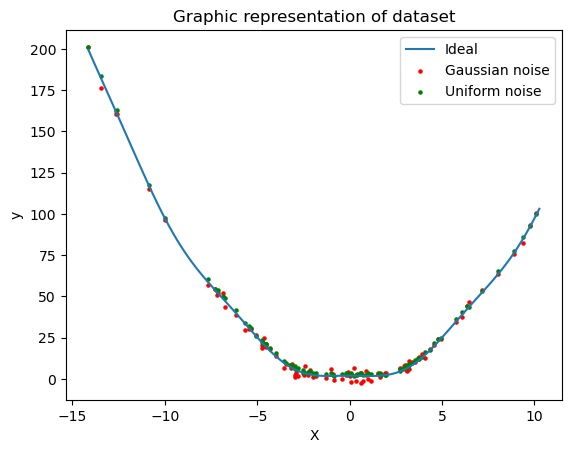

In [3]:
x = np.arange(np.min(X),np.max(X)+0.2, 0.2)
g = 2.5382 * np.cos(x) + x ** 2 - 0.5 
plt.plot(x,g, label='Ideal')
plt.scatter(X,n, label='Gaussian noise', s=5, color='r')
plt.scatter(X,u, label='Uniform noise', s=5, color='green')
plt.title('Graphic representation of dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

from pysr import PySRRegressor

model = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)    
    procs=8,
)

In [4]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "sin",
        "exp",
        "log",
    ],
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)    
    warm_start=True,
    turbo=True,
    #batching=True, not so useful for this example
)

## 1. Ideal


In [5]:
model.fit(X, y)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/julia_helpers.py:208: UserWarning: Your system's Python library is static (e.g., conda), so precompilation will be turned off. For a dynamic library, try using `pyenv` and installing with `--enable-shared`: https://github.com/pyenv/pyenv/blob/master/plugins/python-build/README.md#building-with---enable-shared.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          25.577095   
	1        2.973985                                          (x0 * x0)   
	2        0.060122                           ((x0 * x0) + -0.6797542)   
	3        0.755479                              ((x0 * x0) + cos(x0))   
	4        0.962733                ((x0 * x0) + (cos(x0) * 2.6007314))   
	5        2.339234  (((x0 * x0) + (cos(x0) * 2.6007314)) + -0.4852...   
	6        0.087560  (((x0 * x0) + (cos(x0) * exp(cos(-0.3481392)))...   
	7  >>>>  1.364981  (((x0 * x0) + (cos(x0) * exp(cos(-0.3481392)))...   
	
	          loss  complexity  
	0  1562.370500           1  
	1     4.079560           3  
	2     3.617364           5  
	3     1.699386           6  
	4     0.247784           8  
	5     0.002303          10  
	6     0.001933          12  
	7     0.000494          13  
]

In [6]:
p_1 = model.predict(X)
l_1 = model.latex()
p=[]
l=[]
p.append(p_1), l.append(l_1)

(None, None)

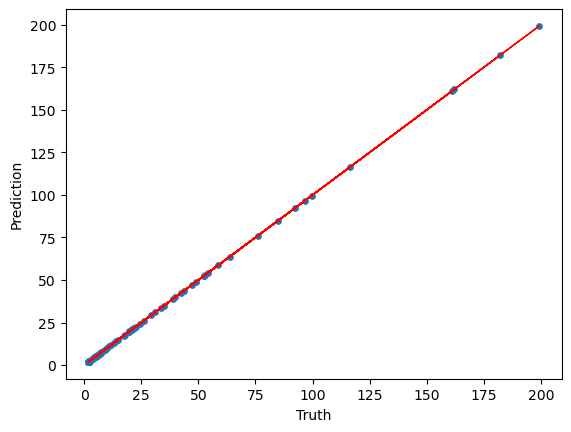

In [7]:
plt.scatter(y, p_1,s=15)
plt.plot(y,y, color='r', lw=1)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

In [8]:
md(f"The model has this equation as output: ${l[0]}$")

The model has this equation as output: $x_{0}^{2} + 2.56 \cos{\left(x_{0} \right)} - 0.514$

## 2. Gaussian noise


In [9]:
model.fit(X,n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          25.565628   
	1         2.649538                                          (x0 * x0)   
	2         0.032575                           ((x0 * x0) + -0.6968202)   
	3   >>>>  0.245098                              ((x0 * x0) + cos(x0))   
	4         0.094864                ((x0 * x0) + (cos(x0) * 2.3121405))   
	5         0.029239  ((x0 * x0) + ((cos(x0) * 2.147027) + -0.418183...   
	6         0.001633  (((x0 * x0) + ((0.9130835 + 1.3102312) * cos(x...   
	7         0.014035  (((x0 * x0) + (cos(x0) * exp(cos(sin(x0))))) +...   
	8         0.024284  (((x0 * (log(1.1020701) + x0)) + cos(x0)) + (c...   
	9         0.000719  ((((x0 * (log(1.1020701) + x0)) + sin(-0.62220...   
	10        0.010249  ((((x0 * (log(1.1020701) + x0)) + -0.622207) +...   
	11        0.007907  ((((x0 * (log(1.1020701) + x0)) + sin(-0.62220...   
	
	           loss  complexity  
	0   1540.720000           1  
	1      7.697756           3  
	2      7.212232           5  
	3      5.644496           6  
	4      4.669035           8  
	5      4.403830          10  
	6      4.389471          12  
	7      4.328293          13  
	8      4.224451          14  
	9      4.221416          15  
	10     4.178373          16  
	11     4.145463          17  
]

In [10]:
p_2 = model.predict(X)
l_2 = model.latex()
p.append(p_2), l.append(l_2)

(None, None)

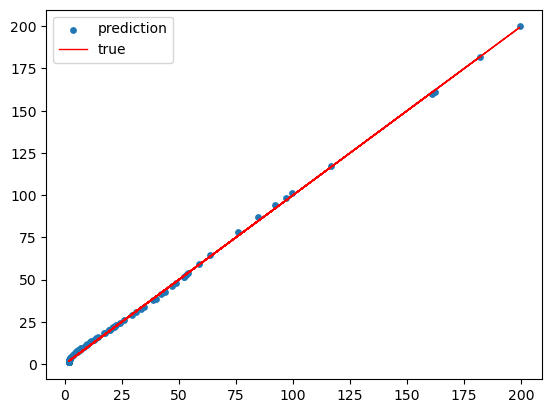

In [11]:
plt.scatter(y, p_2,s=15, label='prediction')
plt.plot(y,y, color='r', lw=1, label='true')
plt.legend()
plt.show()

In [12]:
md(f"The model has this equation as output: ${l[1]}$")

The model has this equation as output: $x_{0}^{2} + \cos{\left(x_{0} \right)}$

## 3. Uniform noise

In [13]:
model.fit(X,u)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          26.647987   
	1         2.969614                                          (x0 * x0)   
	2         0.028812                         (x0 * (x0 + -0.093732625))   
	3         0.717553                              ((x0 * x0) + cos(x0))   
	4         0.508909                ((x0 * x0) + (cos(x0) * 2.4634237))   
	5         0.001644           ((x0 * x0) + (sin(cos(x0)) * 2.8291402))   
	6   >>>>  0.600335  ((x0 * x0) + ((cos(x0) + 0.25417122) * 2.46342...   
	7         0.010261  ((x0 * x0) + ((cos(x0) * 2.4634237) + cos(0.95...   
	8         0.000680  ((x0 * x0) + ((cos(x0) * 2.4634237) + sin(cos(...   
	9         0.000067  ((x0 * x0) + ((cos(x0) * 2.4634237) + cos(cos(...   
	10        0.005751  ((x0 * x0) + ((cos(x0) * (2.4634237 + 0.098698...   
	11        0.002175  ((((x0 * x0) + (cos(x0) * exp(0.9299151))) + (...   
	
	           loss  complexity  
	0   1565.774200           1  
	1      4.124351           3  
	2      3.893409           5  
	3      1.899768           6  
	4      0.686543           8  
	5      0.685415           9  
	6      0.376038          10  
	7      0.372199          11  
	8      0.371946          12  
	9      0.371921          13  
	10     0.369788          14  
	11     0.368985          15  
]

In [14]:
p_3 = model.predict(X)
l_3 = model.latex()
p.append(p_3), l.append(l_3)

(None, None)

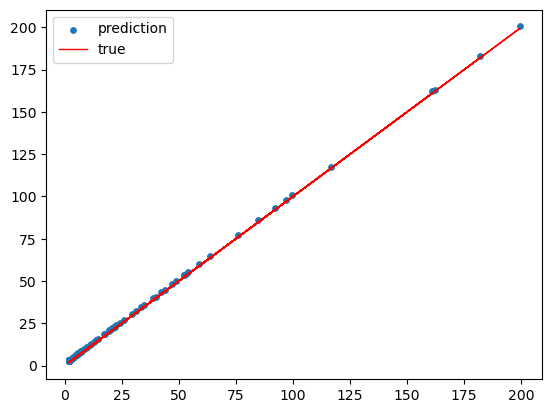

In [15]:
plt.scatter(y, p_3,s=15, label='prediction')
plt.plot(y,y, color='r', lw=1, label='true')
plt.legend()
plt.show()

In [16]:
md(f"The model has this equation as output: ${l[2]}$")

The model has this equation as output: $x_{0}^{2} + 2.46 \cos{\left(x_{0} \right)} + 0.626$

## Comparison beetween ideal and noised

Gaussian

I compute the diferences between ideal and noised data, and later I used the discovered formulas to do the same:

In [17]:
d_1 = y-n 
d_2 = p_1-p_2

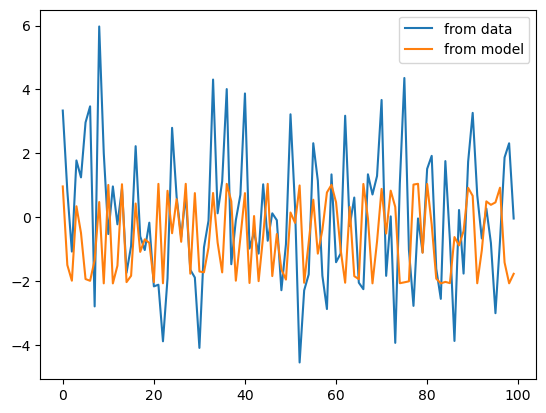

In [18]:
plt.plot(d_1, label='from data')
plt.plot(d_2, label='from model')
plt.legend()

seems that the model reduces the discrepances between ideal data and gaussian-noised data: I think that's fine because we find in both cases two formulas very similar. ($ x^2+a\cdot cos(x)+ b$, where  $a, b \in \mathbb{R}$)


Uniform

In [19]:
r_1 = y-u
r_2 = p_1-p_3

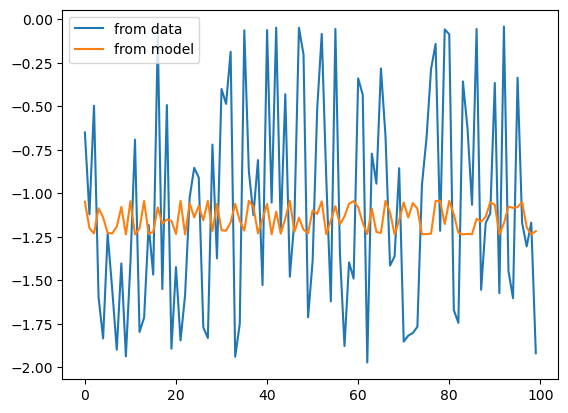

In [20]:
plt.plot(r_1, label='from data')
plt.plot(r_2, label='from model')
plt.legend()

## Tryhard #1: using only 50 points

In [21]:
X = 5 * np.random.randn(50,1)
y = 2.5382 * np.cos(X) + X ** 2 - 0.5 
n = y + a*np.random.randn(50,1)
u = y + a*np.random.rand(50,1)

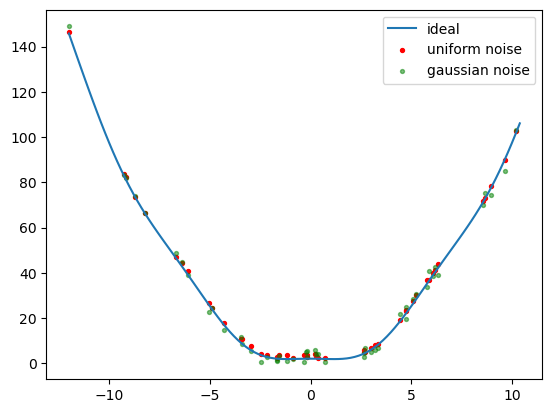

In [22]:
x = np.arange(np.min(X),np.max(X)+0.2, 0.2)
g = 2.5382 * np.cos(x) + x ** 2 - 0.5 
plt.plot(x,g, label='ideal')
plt.scatter(X,u, label='uniform noise', color='r', s=8)
plt.scatter(X,n, label='gaussian noise', color='green', s=8, alpha=0.5)
plt.legend()

Ideal

In [23]:
model.fit(X, y)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                           29.17423   
	1         2.774637e+00                                          (x0 * x0)   
	2         4.319562e-02                            ((x0 * 0.9867062) * x0)   
	3         8.244341e-01                              ((x0 * x0) + cos(x0))   
	4         9.615644e-01                ((x0 * x0) + (cos(x0) * 2.5254734))   
	5         1.996625e+00  (((x0 * x0) + -0.53199434) + (cos(x0) * 2.4634...   
	6         2.530190e-01  (((x0 * x0) + sin(-0.53199434)) + (cos(x0) * 2...   
	7         2.934649e-07  (((x0 * x0) + log(exp(sin(-0.53199434)))) + (c...   
	8         9.088254e-03  (((x0 * x0) + (cos(x0) + (cos(x0) * 1.6124839)...   
	9         2.095560e-01  (((x0 * x0) + (sin(cos(x0)) + (cos(x0) * 1.612...   
	10        3.736608e-05  (((x0 * x0) + (sin(cos(x0)) + (cos(x0) * 1.612...   
	11  >>>>  1.941529e+00  ((((x0 * x0) + 0.10109275) + -1.2379838) + ((l...   
	
	           loss  complexity  
	0   1092.831800           1  
	1      4.251426           3  
	2      3.899558           5  
	3      1.709890           6  
	4      0.249899           8  
	5      0.004608          10  
	6      0.003578          11  
	7      0.003578          13  
	8      0.003482          16  
	9      0.002823          17  
	10     0.002823          18  
	11     0.000405          19  
]

In [24]:
l_4 = model.latex()
p_4 = model.predict(X)
p.append(p_4), l.append(l_4)

(None, None)

In [25]:
md(f"The model has this equation as output: ${l[3]}$")

The model has this equation as output: $x_{0}^{2} + 2.53 \log{\left(e^{\cos{\left(x_{0} \right)}} \right)} - 0.481$

Gaussian

In [26]:
model.fit(X, n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          29.494015   
	1         2.284255                                          (x0 * x0)   
	2         0.008093                            ((x0 * x0) * 0.9904284)   
	3         0.377454                              ((x0 * x0) + cos(x0))   
	4   >>>>  0.337189                ((x0 * x0) + (cos(x0) * 3.4490428))   
	5         0.010079  ((x0 * (x0 + -0.05217419)) + (3.4490817 * cos(...   
	6         0.002421  (((x0 * (x0 + -0.044002667)) + (cos(x0) * 3.44...   
	7         0.019891  ((x0 * x0) + ((cos(exp(3.4490817) * x0) + 3.44...   
	8         0.044234  ((x0 * x0) + ((cos(exp(sin(x0 * x0))) + 3.4490...   
	9         0.001244  ((x0 * x0) + (((sin(exp(x0) * x0) * cos(x0)) +...   
	10        0.026365  ((x0 * x0) + ((cos(exp(cos(exp(sin(exp(x0)))) ...   
	11        0.038296  ((x0 * x0) + ((cos(exp(cos(sin(x0)) + 3.449081...   
	
	           loss  complexity  
	0   1096.247700           1  
	1     11.371832           3  
	2     11.189247           5  
	3      7.671400           6  
	4      3.908373           8  
	5      3.830380          10  
	6      3.802665          13  
	7      3.727775          14  
	8      3.566475          15  
	9      3.557615          17  
	10     3.465044          18  
	11     3.334853          19  
]

In [27]:
l_4 = model.latex()
p_4 = model.predict(X)
p.append(p_4), l.append(l_4)

(None, None)

In [28]:
md(f"The model has this equation as output: ${l[4]}$")

The model has this equation as output: $x_{0}^{2} + 3.45 \cos{\left(x_{0} \right)}$

uniform

In [29]:
model.fit(X, u)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          30.152807   
	1         2.680674                                          (x0 * x0)   
	2         0.026831                             ((x0 * x0) + 0.515567)   
	3         0.726080                              ((x0 * x0) + cos(x0))   
	4         0.739707                ((x0 * x0) + (cos(x0) * 2.6938977))   
	5   >>>>  0.246547  ((x0 * x0) + ((cos(x0) * 2.5994072) + 0.5846875))   
	6         0.020307  ((x0 * x0) + ((cos(x0) + 0.14739555) * exp(0.9...   
	7         0.036146  (((x0 * x0) + (sin(sin(cos(x0))) * 3.4490428))...   
	8         0.001137  (((x0 * x0) + (sin(sin(cos(x0))) * 3.4490428))...   
	9         0.002698  (((x0 * x0) + (sin(cos(x0)) * ((3.4490428 + -1...   
	10        0.001780  (((x0 * x0) + (sin(cos(x0)) * ((3.4490428 + -1...   
	11        0.001037  (((x0 * x0) + (sin(cos(x0 + 0.018665861)) * ((...   
	12        0.010581  (((x0 * (x0 + -1.0160795)) + x0) + ((cos(x0) *...   
	
	           loss  complexity  
	0   1082.956500           1  
	1      5.084023           3  
	2      4.818396           5  
	3      2.331148           6  
	4      0.530968           8  
	5      0.324280          10  
	6      0.317762          11  
	7      0.306481          12  
	8      0.306133          13  
	9      0.304485          15  
	10     0.303944          16  
	11     0.303314          18  
	12     0.300121          19  
]

In [30]:
l_4 = model.latex()
p_4 = model.predict(X)
p.append(p_4), l.append(l_4)
md(f"The model has this equation as output: ${l[5]}$")

The model has this equation as output: $x_{0}^{2} + 2.60 \cos{\left(x_{0} \right)} + 0.585$

It seems that the gaussian noise has a greater disturbance on the data, in fact the expression that I found is slightly different from the ideal one. The model suffers a bit with gaussian noise, while the model is reliable with the uniform noise

## Tryhard: 5(or 2) variables



In [31]:
X = 5 * np.random.randn(100, 2)
a = 2 #weight for noise
y = 2.5382 * np.cos(X[:,1]) + X[:,0] ** 2 - 0.5
n = y + a*np.random.randn(100)
u = y + a*np.random.rand(100)

we have created a dataset with 100 points with 2 features each. The relation we want to investigate is

$$
2.5382 cos(x_1)+x_0^2-0.5
$$

## 1. Ideal

In [32]:
model.fit(X,y)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          28.115032   
	1        3.028752                                          (x0 * x0)   
	2        0.051950                           ((x0 * x0) + -0.5692022)   
	3        0.762473                              ((x0 * x0) + cos(x1))   
	4        0.849806                 ((x0 * x0) + (cos(x1) * 2.644299))   
	5        0.009367             ((x0 * x0) + (cos(x1) * exp(0.93245)))   
	6        3.182454  (((x0 * x0) + (cos(x1) * 2.644299)) + -0.5692022)   
	7  >>>>  0.907436  (((x0 * x0) + (cos(x1) * exp(0.9537599))) + lo...   
	8        0.038260  (((x0 * x0) + (cos(x1) * exp(0.9537599))) + si...   
	
	          loss  complexity  
	0  1402.900000           1  
	1     3.283117           3  
	2     2.959125           5  
	3     1.380466           6  
	4     0.252286           8  
	5     0.249934           9  
	6     0.010368          10  
	7     0.001689          12  
	8     0.001505          15  
]

In [33]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[6]}$")

The model has this equation as output: $x_{0}^{2} + 2.60 \cos{\left(x_{1} \right)} - 0.485$

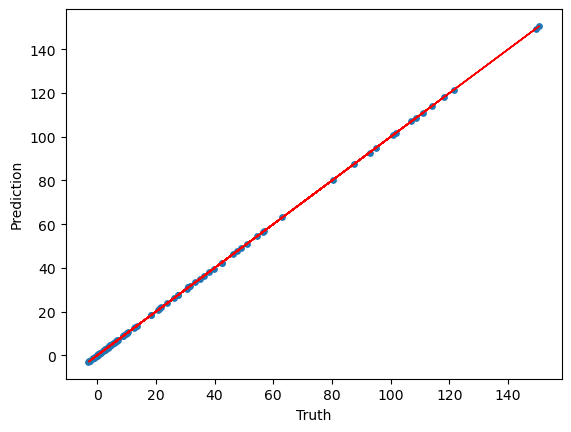

In [34]:
plt.scatter(y, p[6],s=15)
plt.plot(y,y, color='r', lw=1)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

## 2. Gaussian

In [35]:
model.fit(X,n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                           28.10687   
	1        2.543535                                          (x0 * x0)   
	2        0.019386                          ((x0 * x0) + -0.57704353)   
	3        0.273532                              ((x0 * x0) + cos(x1))   
	4  >>>>  0.180115                ((x0 * x0) + (cos(x1) * 3.0523808))   
	5        0.028032  ((x0 * x0) + ((3.0231192 * cos(x1)) + -0.47017...   
	6        0.000024  (((x0 * x0) + ((-0.55259603 + 0.3750667) + (3....   
	7        0.000133  (((x0 * x0) + cos(cos(sin(x0)) + 0.9624099)) +...   
	8        0.016051  (((x0 * x0) + -0.4408362) + ((cos(x1) * (2.644...   
	9        0.007526  (((x0 * x0) + -0.4408362) + ((cos(x1) * (2.644...   
	
	          loss  complexity  
	0  1417.605300           1  
	1     8.755260           3  
	2     8.422298           5  
	3     6.406743           6  
	4     4.468801           8  
	5     4.225159          10  
	6     4.224562          16  
	7     4.224000          17  
	8     4.156742          18  
	9     4.125575          19  
]

In [36]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[7]}$")

The model has this equation as output: $x_{0}^{2} + 3.05 \cos{\left(x_{1} \right)}$

## 3. Uniform

In [37]:
model.fit(X,u)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          29.168753   
	1        2.935830                                          (x0 * x0)   
	2        0.031061                            ((x0 * x0) + 0.4858564)   
	3        0.654671                              ((x0 * x0) + cos(x1))   
	4        0.566955                ((x0 * x0) + (cos(x1) * 2.7135231))   
	5  >>>>  0.355310  ((x0 * x0) + ((cos(x1) * 2.7135231) + 0.573015...   
	6        0.000260  ((x0 * x0) + (((cos(x1) * 2.7135231) + 0.57301...   
	7        0.004569  ((x0 * x0) + (cos(cos(log(cos(sin(x0))))) + (c...   
	8        0.025879  ((x0 * x0) + (cos(cos(exp(x0 * (x0 * -0.088310...   
	
	          loss  complexity  
	0  1391.223800           1  
	1     3.920733           3  
	2     3.684578           5  
	3     1.914554           6  
	4     0.616051           8  
	5     0.302690          10  
	6     0.302533          12  
	7     0.298414          15  
	8     0.283362          17  
]

In [38]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[8]}$")

The model has this equation as output: $x_{0}^{2} + 2.71 \cos{\left(x_{1} \right)} + 0.573$

## 5 (3 fake) variables

In [39]:
X = 5 * np.random.randn(100, 5)
a = 2 #weight for noise
y = 2.5382 * np.cos(X[:,3]) + X[:,0] ** 2 - 0.5
n = y + a*np.random.randn(100)
u = y + a*np.random.rand(100)

we have created a dataset with 100 points with 5 features each. The relation we want to investigate is

$$
2.5382 cos(x_3)+x_0^2-0.5
$$

### Ideal

In [40]:
model.fit(X,y)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                           24.89716   
	1         2.651398                                          (x0 * x0)   
	2         0.118341                           ((x0 * x0) + -0.8668704)   
	3         0.592982                              ((x0 * x0) + cos(x3))   
	4         0.829785                ((x0 * x0) + (cos(x3) * 2.3424845))   
	5         0.213022           ((x0 * x0) + (exp(1.0036138) * cos(x3)))   
	6         2.429870  (((x0 * x0) + (cos(x3) * 2.3424845)) + -0.4625...   
	7         0.282971  ((x0 * x0) + ((exp(1.0036138) * cos(x3)) + -0....   
	8         1.296544  (((x0 * x0) + -0.5661552) + (cos(x3) * exp(cos...   
	9         0.980898  (((x0 * x0) + sin(-0.5661552)) + (cos(x3) * ex...   
	10  >>>>  2.620025  (((x0 * x0) + sin(sin(-0.5661552))) + (cos(x3)...   
	
	          loss  complexity  
	0   716.235800           1  
	1     3.565174           3  
	2     2.813788           5  
	3     1.555115           6  
	4     0.295815           8  
	5     0.239059           9  
	6     0.021049          10  
	7     0.015861          11  
	8     0.004338          12  
	9     0.001626          13  
	10    0.000118          14  
]

In [41]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[9]}$")

The model has this equation as output: $x_{0}^{2} + 2.54 \cos{\left(x_{3} \right)} - 0.511$

### Gaussian noise


In [42]:
model.fit(X,n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          24.745422   
	1        2.340069                                          (x0 * x0)   
	2        0.083953                           ((x0 * x0) + -1.0181597)   
	3  >>>>  0.084484                              ((x0 * x0) + cos(x3))   
	4        0.079191              ((x0 * x0) + (cos(x3) + -0.87371486))   
	5        0.029313          (((x0 * x0) + exp(cos(x3))) + -2.0442004)   
	6        0.051533  (((x0 * x0) + -0.83492136) + (cos(x3) * 1.8487...   
	7        0.001693  (((x0 * x0) + sin(-0.83492136)) + (cos(x3) * 1...   
	8        0.003337  (((x0 * x0) + cos(x3)) + (exp(cos(x3)) + log(l...   
	9        0.000296  (((x0 * x0) + cos(x3)) + (exp(sin(cos(x3))) + ...   
	
	         loss  complexity  
	0  722.975340           1  
	1    6.707570           3  
	2    5.670800           5  
	3    5.211386           6  
	4    4.448038           8  
	5    4.319543           9  
	6    4.102584          10  
	7    4.095643          11  
	8    4.054844          14  
	9    4.053646          15  
]

In [43]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[10]}$")

The model has this equation as output: $x_{0}^{2} + \cos{\left(x_{3} \right)}$

### Uniform noise

In [44]:
model.fit(X,u)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          25.867403   
	1         2.744788                                          (x0 * x0)   
	2         0.005958                            (x0 * (x0 * 1.0050735))   
	3         0.788825                              ((x0 * x0) + cos(x3))   
	4         0.359246                ((x0 * x0) + (cos(x3) * 1.8898817))   
	5         0.108899           ((x0 * x0) + (cos(x3) * exp(0.8596847)))   
	6         0.105624  ((x0 * x0) + ((cos(x3) * 1.8898817) + 0.246426...   
	7   >>>>  0.127931     ((((x0 * x0) + cos(x3)) + cos(x3)) + 0.374071)   
	8         0.074133  (((x0 * x0) + 0.40610534) + (exp(sin(1.571487)...   
	9         0.097653  (((x0 * x0) + 0.40610534) + (exp(sin(cos(-0.09...   
	10        0.001243  (((x0 * x0) + 0.40610534) + (exp(sin(cos(cos(1...   
	
	          loss  complexity  
	0   716.243040           1  
	1     2.957793           3  
	2     2.922759           5  
	3     1.328039           6  
	4     0.647402           8  
	5     0.580603           9  
	6     0.522405          10  
	7     0.459672          11  
	8     0.426827          12  
	9     0.387117          13  
	10    0.386636          14  
]

In [45]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[11]}$")

The model has this equation as output: $x_{0}^{2} + 2 \cos{\left(x_{3} \right)} + 0.374$

It seems that the model fails with gaussian noise, both with one variable and with two variables. The model is anyway solid with uniform noise. 

Now we can try to increase the number of data, to see if the model can recover the expression that we want.

### fix #1: increasing the points

In [46]:
X = 5 * np.random.randn(1000, 5)
a = 2 #weight for noise
y = 2.5382 * np.cos(X[:,3]) + X[:,0] ** 2 - 0.5
n = y + a*np.random.randn(1000)
model.fit(X,n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          23.896925   
	1        2.518607                                          (x0 * x0)   
	2        0.021134                          ((x0 * x0) + -0.55355996)   
	3  >>>>  0.280368                              ((x0 * x0) + cos(x3))   
	4        0.122875                 ((x0 * x0) + (cos(x3) * 2.496202))   
	5        0.039375  (((x0 * x0) + (cos(x3) * 2.496202)) + -0.62239...   
	6        0.000456  (((x0 * x0) + (exp(cos(-0.3746927)) * cos(x3))...   
	7        0.000002  ((((x0 * x0) + (exp(cos(-0.3746927)) * cos(x3)...   
	
	          loss  complexity  
	0  1140.673300           1  
	1     7.405032           3  
	2     7.098563           5  
	3     5.363002           6  
	4     4.194502           8  
	5     3.876853          10  
	6     3.873320          12  
	7     3.873293          15  
]

In [47]:
md(f"The model has this equation as output: ${model.latex()}$")

The model has this equation as output: $x_{0}^{2} + \cos{\left(x_{3} \right)}$

It seems that the problem persist: perhaps the problem is in the factor of amplification of the noise.

### fix #2: decreasing the noise

In [48]:
X = 5 * np.random.randn(100, 5)
a = 0.5 #weight for noise
y = 2.5382 * np.cos(X[:,3]) + X[:,0] ** 2 - 0.5
n = y + a*np.random.randn(100)
model.fit(X,n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          24.685173   
	1        2.777698                                          (x0 * x0)   
	2        0.086822                           ((x0 * x0) + -0.8114023)   
	3        0.633576                              ((x0 * x0) + cos(x3))   
	4        0.725248                 ((x0 * x0) + (cos(x3) * 2.496202))   
	5  >>>>  0.361830  ((x0 * x0) + ((cos(x3) * 2.496202) + -0.497750...   
	6        0.002961  ((x0 * x0) + ((cos(x3) * 2.496202) + sin(-0.49...   
	7        0.000088  (((x0 * x0) + (cos(x3) * 2.496202)) + (-0.6223...   
	8        0.000032  (((x0 * x0) + -0.47126406) + (exp(cos(cos((1.7...   
	
	          loss  complexity  
	0  1068.159500           1  
	1     4.130081           3  
	2     3.471728           5  
	3     1.842414           6  
	4     0.431961           8  
	5     0.209490          10  
	6     0.208871          11  
	7     0.208852          12  
	8     0.208812          18  
]

In [49]:
md(f"The model has this equation as output: ${model.latex()}$")

The model has this equation as output: $x_{0}^{2} + 2.50 \cos{\left(x_{3} \right)} - 0.498$

We finally recovered an expression that looks like the ideal one: we can compute the difference between these two quantities.

y is the dataset generated, and f(x) is the prediction from the model with gaussian noise

Text(0, 0.5, '$y-f(x)$')

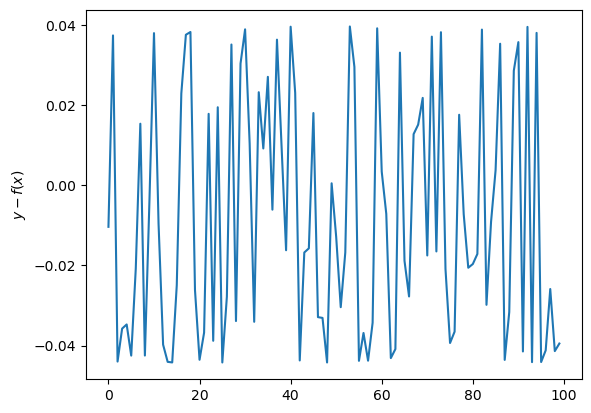

In [50]:
plt.plot(y-model.predict(X))
plt.ylabel(r'$y-f(x)$')

Let's evaluate the percentage error:

Text(0, 0.5, 'percentage error')

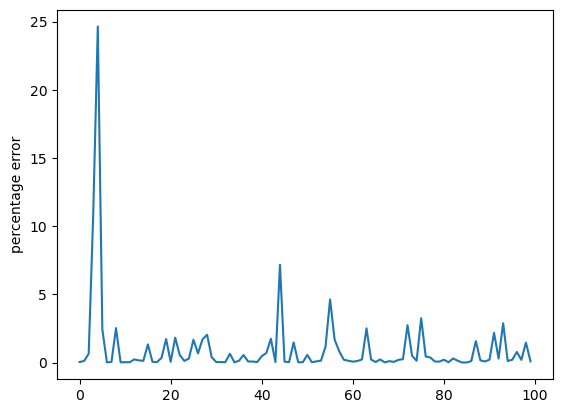

In [51]:
pc_err = 100*np.abs((y-model.predict(X))/y)
err_mean = np.mean(pc_err)
plt.plot(pc_err)
plt.ylabel('percentage error')

there are few critical points, probably these are the ones near zero, where y is small and so the noise is of the same order or pheraps of an higher order of magnitude of y.

In [52]:
md(f'The mean value of the percentage error is: {err_mean}')

The mean value of the percentage error is: 1.0055433788304036

# Nice example: tying to interpolate the Debye model

The Debye model for specific heat has this integral form:

$$ c_v(T) = 9R\bigg(\frac{T}{T_D}\bigg)^3 \int_{0}^{\frac{T_D}{T}}\frac{x^4e^x}{(e^x-1)^2}dx$$

where

$$ x = \frac{hv_sn}{2Lk_bT} \quad T_D=\frac{hv_s}{2K_b}\sqrt[3]{\frac{6}{\pi}\frac{N}{V}}$$

if we consider a cube made by iron (L=$1\ m$), we know that $T_D=464\ K$ and $n=2$ because iron is a BCC solid.

/var/folders/b8/p92pmfdj18923_7h6_3fj7nc0000gn/T/ipykernel_7841/2022150869.py:6: RuntimeWarning: overflow encountered in scalar power
  return x**4 *np.exp(x)/ (np.exp(x) - 1)**2


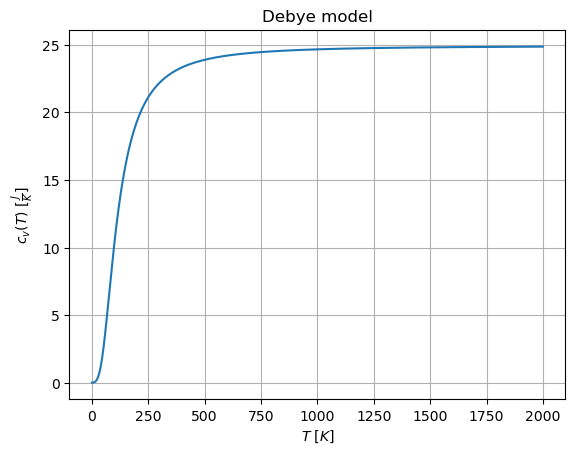

In [53]:
import numpy as np
from scipy.integrate import quad

T_D = 464
def integrand(x):
    return x**4 *np.exp(x)/ (np.exp(x) - 1)**2

T = np.arange(1, 2000, 0.5)  

def calculate_debye_integral(T):
    result, _ = quad(integrand, 0, T_D/T)
    return result

results = np.vectorize(calculate_debye_integral)(T)
C_v = results*9*8.314*(T/T_D)**3

plt.plot(T,C_v)
plt.xlabel(r"$T\ [K]$")
plt.ylabel(r"$c_v(T)\ [\frac{J}{K}]$")
plt.title("Debye model")
plt.grid(True)
plt.show()


In [54]:
C_v1 = C_v.reshape(-1, 1)
T1 = T.reshape(-1, 1)

In [55]:
debyemodel = PySRRegressor(
    niterations=50,  # < Increase me for better results
    binary_operators=["+", "*",'-','/',"^"],
    constraints={'^': (1, 1)},
    nested_constraints={"^": {"^": 2}},
    unary_operators=[
        "exp",
        "log",
        'sinh',
        'cosh',
        'erf',
    ],
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
    turbo=True,  
    cluster_manager="lsf",
    multithreading=True,
)


In [56]:
debyemodel.fit(T1, C_v1)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!

Expressions evaluated per second: 6.000e+04
Head worker occupation: 3.4%
Progress: 106 / 750 total iterations (14.133%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.491e+01  1.531e-07  22.847485
4           6.496e+00  4.480e-01  (log(x0) / 0.28724656)
6           6.416e+00  6.181e-03  (log(x0 - 0.87758327) / 0.2872663)
7           6.193e+00  3.546e-02  (log(x0 - log(x0)) / 0.2872663)
8           6.067e+00  2.062e-02  (((log(x0) - 0.7517037) / 0.7517037) / 0.3326383)
9           1.576e+00  1.348e+00  sinh(x0 / ((x0 * 0.25087598) + sinh(2.432785)))
12          1.340e+00  5.411e-02  cosh((x0 - exp(2.055413)) / ((x0 * 0.25126722) + exp(1.2850792...
                                  )))
14          1.297e+00  1.617e-02  cosh((x0 - exp(2.055413)) / ((x0 * 0.25126722) + (cosh(2.05541...
                                  3) - 0.73101896)))
16          1.291e+00

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          22.847485   
	1         0.447960                                log(x0 ^ 3.4814858)   
	2         0.078048                    (log(x0 ^ 4.451175) - 6.546977)   
	3         0.672980           (x0 / ((x0 * 0.037550285) - -2.7555566))   
	4         0.580585           sinh(x0 / ((x0 * 0.2511842) + 5.556373))   
	5         0.006704    sinh(x0 / ((x0 * 0.25087598) + sinh(2.432785)))   
	6         0.176374  sinh((x0 / ((x0 * 0.17634611) + 2.640101)) - 1...   
	7         0.206944  exp(((x0 - sinh(cosh(2.0299697))) / (x0 * 0.21...   
	8         0.000791  exp(((x0 - exp(exp(cosh(0.5378985)))) / (x0 * ...   
	9         2.034451  exp(((x0 - (exp(exp(2.0299697)) / x0)) / (x0 *...   
	10        0.432160  sinh(x0 / ((x0 * sinh(sinh(0.25087598))) + (ex...   
	11        1.195838  sinh(x0 / (((x0 * sinh(0.25087598)) + (exp(sin...   
	12        0.316534  ((cosh(x0 / ((x0 * 0.25087598) + (exp(sinh(2.4...   
	13  >>>>  0.630376  ((cosh(x0 / ((x0 * 0.25087598) + (exp(cosh(2.4...   
	
	         loss  complexity  
	0   24.905958           1  
	1    6.496257           4  
	2    5.557404           6  
	3    2.835310           7  
	4    1.586556           8  
	5    1.575955           9  
	6    1.321130          10  
	7    0.873367          12  
	8    0.872676          13  
	9    0.114104          14  
	10   0.048076          16  
	11   0.014541          17  
	12   0.010595          18  
	13   0.005641          19  
]

In [57]:
md(f"The model has this equation as output: ${debyemodel.latex()}$")

The model has this equation as output: $0.950 \cosh{\left(\frac{x_{0}}{0.251 x_{0} + \frac{661.}{x_{0}}} \right)} - 0.656$

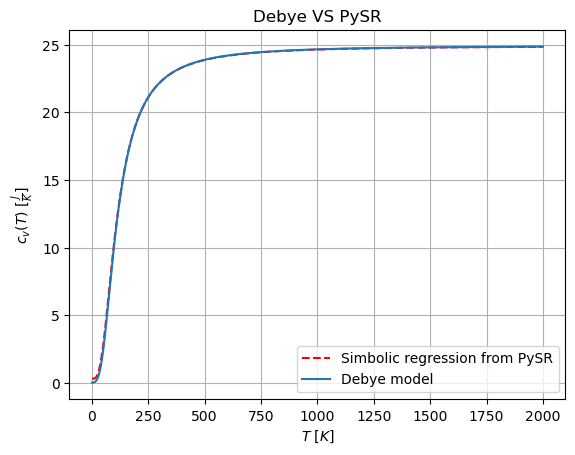

In [58]:
from scipy.special import erf
#c_v_int = np.exp(np.exp(np.sinh(erf(0.695 * np.log(0.0356 * T))))) - 0.808
#plt.plot(T,c_v_int, label='Simbolic regression from PySR')
c_v_pysr = debyemodel.predict(T1)
plt.plot(T,c_v_pysr,linestyle='--',label='Simbolic regression from PySR', color='r')
plt.plot(T,C_v, label='Debye model')
plt.xlabel(r"$T\ [K]$")
plt.ylabel(r"$c_v(T)\ [\frac{J}{K}]$")
plt.title("Debye VS PySR")
plt.grid(True)
plt.legend()

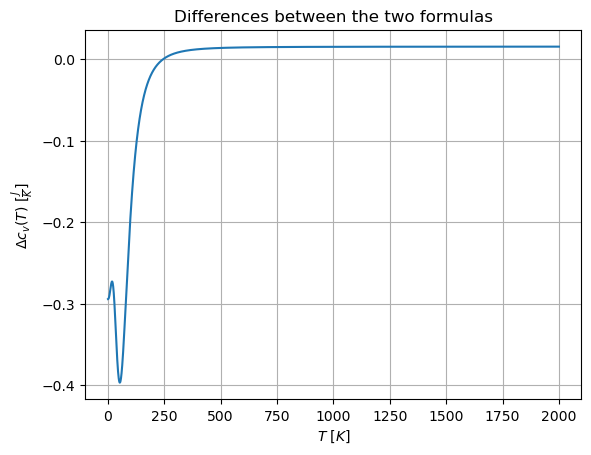

In [61]:
plt.plot(T,(C_v-c_v_pysr))
plt.title('Differences between the two formulas')
plt.xlabel(r"$T\ [K]$")
plt.ylabel(r"$\Delta c_v(T)\ [\frac{J}{K}]$")
plt.grid(True)


That was a bold try :-)